<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/Modern_CNN_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build Model Modern CNN dengan Tensorflow

In [ ]:
!pip install tensorflow

# Persiapan Lingkungan

In [ ]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Memuat dan Memproses Dataset

In [ ]:
# Memuat dataset CIFAR-10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi nilai pixel
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Mengubah label menjadi one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


# Membangun Arsitektur Model CNN Modern

In [ ]:
# Membangun model CNN dengan arsitektur modern
model = models.Sequential()

# ----- Block 1 -----
# Layer konvolusi pertama dengan 32 filter, kernel 3x3, dan padding 'same'
model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())  # Normalisasi
model.add(layers.Activation('relu'))      # Fungsi aktivasi ReLU

# Layer konvolusi kedua
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))  # Pengurangan dimensi
model.add(layers.Dropout(0.25))                  # Dropout untuk mencegah overfitting

# ----- Block 2 -----
# Layer konvolusi dengan 64 filter
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Layer konvolusi tambahan
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# ----- Fully Connected Layers -----
model.add(layers.Flatten())  # Meratakan fitur untuk input ke Dense layer
model.add(layers.Dense(512)) # Fully connected layer dengan 512 neuron
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))  # Dropout lebih tinggi untuk mencegah overfitting
model.add(layers.Dense(10, activation='softmax'))  # Output layer dengan 10 neuron (satu untuk tiap kelas)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Menyusun dan Mengkompilasi Model

In [ ]:
# Menyusun dan mengkompilasi model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Melatih Model

In [ ]:
# Melatih model
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=25,
                    validation_split=0.2)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3950 - loss: 1.8024 - val_accuracy: 0.5956 - val_loss: 1.1268
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6235 - loss: 1.0564 - val_accuracy: 0.5986 - val_loss: 1.1020
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6981 - loss: 0.8618 - val_accuracy: 0.7078 - val_loss: 0.8332
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7329 - loss: 0.7532 - val_accuracy: 0.7104 - val_loss: 0.8415
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7626 - loss: 0.6733 - val_accuracy: 0.7405 - val_loss: 0.7442
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7818 - loss: 0.6184 - val_accuracy: 0.7379 - val_loss: 0.7762
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8058 - loss: 0.5611 - val_accuracy: 0.7463 - val_loss: 0.7311
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8110 - loss: 0.5356 - val_accuracy

# Mengevaluasi Model

In [ ]:
# Mengevaluasi model pada data test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.6726
Test loss: 0.6694747805595398
Test accuracy: 0.8057000041007996


# Visualisasi Hasil Pelatihan

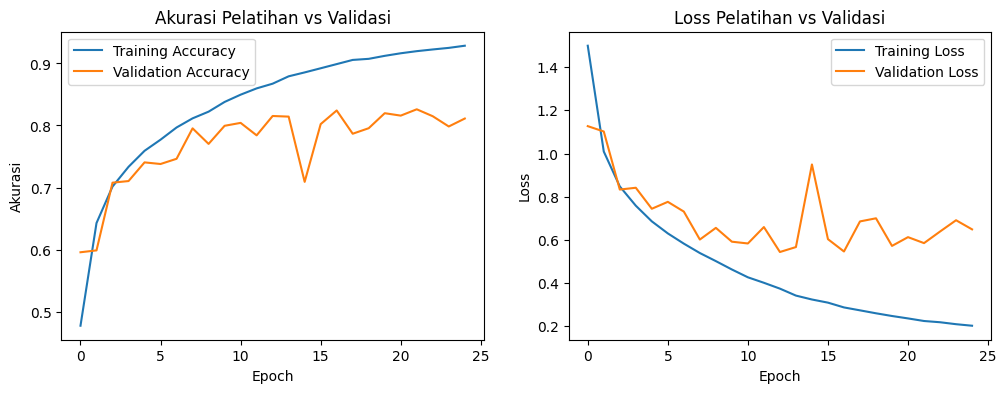

In [ ]:
# Visualisasi hasil pelatihan: akurasi dan loss
plt.figure(figsize=(12,4))

# Grafik Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Build Model Modern CNN dengan PyTorch

# Persiapan Lingkungan

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


# Memuat dan Memproses Dataset

In [ ]:
# Transformasi: konversi ke tensor dan normalisasi
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),  # mean per channel (R, G, B)
                         (0.2023, 0.1994, 0.2010))  # std per channel (R, G, B)
])

# Memuat dataset CIFAR-10 untuk training
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True
)

# Memuat dataset CIFAR-10 untuk testing
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=64, shuffle=False
)

100%|██████████| 170M/170M [00:05<00:00, 29.7MB/s]


# Membuat Model CNN

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # ----- Block 1 -----
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(32)

        # ----- Block 2 -----
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4   = nn.BatchNorm2d(64)

        # ----- Fully Connected -----
        self.fc1   = nn.Linear(64 * 8 * 8, 512)
        self.bn5   = nn.BatchNorm1d(512)
        self.fc2   = nn.Linear(512, 10)

        self.relu  = nn.ReLU()
        self.pool  = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.25)
        self.dropout_fc = nn.Dropout(0.5)

    def forward(self, x):
        # Block 1
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)

        # Block 2
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout(x)

        # Fully Connected
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.bn5(self.fc1(x)))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x

# Inisialisasi model dan pindahkan ke device (CPU/GPU)
model = Net().to(device)

# Menyusun Kriteria Pelatihan

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Melatih Model dan Mencatat Performa

In [ ]:
num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)

    # Evaluasi model pada test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/10], Loss: 1.1960, Test Accuracy: 67.38%
Epoch [2/10], Loss: 0.8636, Test Accuracy: 75.51%
Epoch [3/10], Loss: 0.7449, Test Accuracy: 76.49%
Epoch [4/10], Loss: 0.6640, Test Accuracy: 78.88%
Epoch [5/10], Loss: 0.6066, Test Accuracy: 79.85%
Epoch [6/10], Loss: 0.5525, Test Accuracy: 79.82%
Epoch [7/10], Loss: 0.5113, Test Accuracy: 81.01%
Epoch [8/10], Loss: 0.4736, Test Accuracy: 82.04%
Epoch [9/10], Loss: 0.4404, Test Accuracy: 82.23%
Epoch [10/10], Loss: 0.4065, Test Accuracy: 83.58%


# Visualisasi Hasil Pelatihan

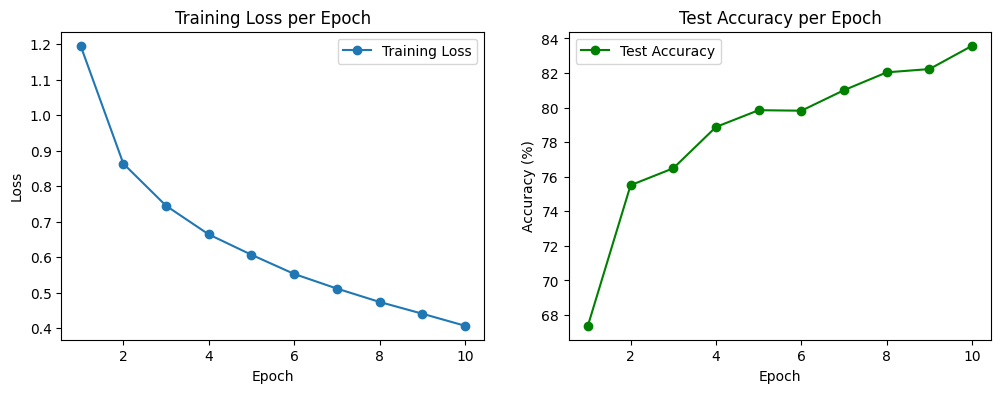

In [ ]:
plt.figure(figsize=(12, 4))

# Grafik Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Grafik Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', label='Test Accuracy', color='green')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

# Menggunakan TensorFlow (Keras) dengan ResNet50

# Persiapan Lingkungan dan Import Library

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.datasets import cifar10

# Aktifkan mixed precision training (jika GPU mendukung)
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
print("Mixed precision policy:", mixed_precision.global_policy())

print("TensorFlow version:", tf.__version__)
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

Mixed precision policy: <DTypePolicy "mixed_float16">
TensorFlow version: 2.18.0
GPU Devices: []


# Memuat dan Memproses Dataset dengan tf.data

In [ ]:
# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Fungsi preprocess: resize gambar ke 224x224, casting ke float32, dan normalisasi
def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    image = preprocess_input(image)
    # Ubah label ke one-hot encoding
    label = tf.one_hot(tf.squeeze(label), depth=10)
    return image, label

batch_size = 4

# Gabungkan data training, lalu shuffle
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.shuffle(buffer_size=10000, reshuffle_each_iteration=False)

# Tentukan ukuran validation (misalnya 20% data training)
val_size = int(0.2 * len(x_train))

# Buat train_dataset dan val_dataset dengan menggunakan skip dan take
train_dataset = dataset.skip(val_size)
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = dataset.take(val_size)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Untuk test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Membuat Model dengan Transfer Learning (ResNet50)

In [ ]:
# Inisialisasi ResNet50 tanpa top layer, dengan input 224x224
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base model agar tidak dilatih

# Menambahkan layer baru untuk transfer learning
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax', dtype='float32')  # Set dtype float32 untuk output final
])

# Kompilasi model dengan optimizer Adam dan loss categorical_crossentropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Untuk melihat arsitektur model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

# tesss

# Melatih Model

In [ ]:
history = model.fit(
    train_dataset,
    epochs=1,             # Kurangi epoch jika hanya untuk demonstrasi
    validation_data=val_dataset
)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14297s 1s/step - accuracy: 0.8230 - loss: 0.5683 - val_accuracy: 0.8777 - val_loss: 0.4772


# Mengevaluasi Model

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2851s 1s/step - accuracy: 0.8749 - loss: 0.5128
Test Loss: 0.5062239766120911
Test Accuracy: 0.8741999864578247


# Visualisasi Hasil Pelatihan

NameError: name 'history' is not defined

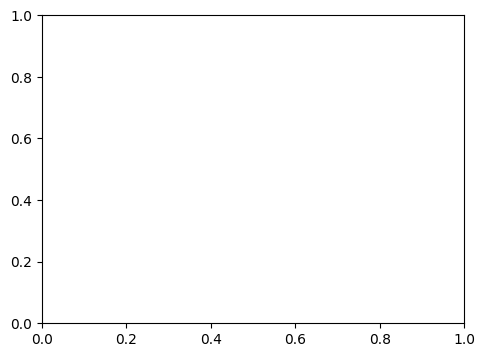

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Plot Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Menggunakan PyTorch dengan ResNet18

# Persiapan Lingkungan dan Import Library

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


# Memuat dan Memproses Dataset

In [ ]:
# Transformasi untuk resize dan normalisasi sesuai ImageNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Mean ImageNet
                         std=[0.229, 0.224, 0.225])   # Std ImageNet
])

# Memuat dataset CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:02<00:00, 57.1MB/s]


# Membuat Model ResNet18 dengan Transfer Learning

In [ ]:
from torchvision import models

# Mengambil model ResNet18 yang sudah di-pretrained
model = models.resnet18(pretrained=True)

# Ubah fully connected layer agar output menjadi 10
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 116MB/s]


# Menentukan Loss Function dan Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Melatih Model

In [ ]:
num_epochs = 5
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Reset gradien
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)
        loss.backward()          # Backward pass
        optimizer.step()         # Update bobot

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)

    # Evaluasi pada test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100 * correct / total
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

# Visualisasi Hasil Pelatihan

In [ ]:
plt.figure(figsize=(12,4))

# Plot Training Loss
plt.subplot(1,2,1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot Test Accuracy
plt.subplot(1,2,2)
plt.plot(range(1, num_epochs+1), test_accuracies, marker='o', color='green')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.show()